# DACON 4 - 2차 제출
## 제목 : COVID-19 Data EDA : 시각화로 한눈에 이해하는 COVID-19 (Update ver.2020-04-19)

### 코드설명 :

안녕하세요. 팀 쇠똥구리 입니다.

저희 팀의 1차 제출은 "COVID-19 data EDA : 시각화로 한눈에 이해하는 COVID-19"입니다. 

* EDA란? Exploratory Data Analysis의 줄임말로 탐색적 데이터 분석이라고 합니다. 데이터를 다양한 각도에서 관찰하고 이해하는 과정으로, 한마디로 데이터를 분석하기 전에 그래프나 통계적인 다양한 방법을 통해 자료를 직관적으로 이해하는 과정입니다.

본 대회의 목적인 COVID-19 확산 방지 및 예방을 위한 인사이트 발굴 이전에 EDA 과정이 우선되어야 할 텐데요, 

저희는 본격적인 분석 이전에, 데이터를 전체적으로 살펴보고 개별 값을 이해하며, 현상을 더 잘 바라볼 수 있도록 다양한 각도에서 살펴보는 과정을 선행하였습니다. 

EDA의 과정을 통해 필요한 데이터의 수집을 결정하고 미쳐 발견하진 못한 잠재적 패턴을 발굴하기도 합니다. (궁금하다면 3차 제출을 기대해주세요!)

특히 시각화는 데이터를 한눈에 이해하는데에 큰 도움이 됩니다.

저희의 첫 제출인 EDA는 주어진 개별 데이터들을 key 값의 내용에 따라 크게 3파트로 나누어 

1. Time Related, 2. Region Related, 3. Case + Patient Related 

로 나누어 분석을 진행해 보았습니다.

그럼 재미있게 보시고, 내용이 유익하셨다면 투표 부탁드립니다!

감사합니다.

* 링크 1 - 1. Time Related
* 링크 2 - 2. Region Related,
* 링크 3 - 3. Case + Patient Related 

---- 
# 0. Setting

필요한 모듈을 import한 후 dataset(Updated ver.2020.04.20)을 읽어들입니다.

In [36]:
import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import plotly.express as px
import folium
from folium import plugins
import branca
import json
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import matplotlib.pylab as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

pio.renderers.default = "notebook_connected"

In [13]:
files = glob.glob('dataset/*.csv')
data = []
for i in files :
    i = re.sub("dataset\\\\", "", i)
    data.append(re.sub(".csv","",i))
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])
data

['Case',
 'PatientInfo',
 'PatientRoute',
 'Region',
 'SearchTrend',
 'SeoulFloating',
 'Time',
 'TimeAge',
 'TimeGender',
 'TimeProvince',
 'Weather']

- - -

# 1. Time related

시간을 key 로 갖는 Dataset 들을 분석하였습니다. 시간에 따른 변화를 표현하기 위해 애니메이션 효과가 있는 plotly를 사용하였습니다. 재생 버튼과 축을 이용해서 살펴주시면 감사하겠습니다~!

### 1) Time

먼저 시간에 따른 누적 확진자와 사망자의 증가 추세를 살펴보았습니다. 

In [20]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=Time.date , y=Time.confirmed, name="comfirmed"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=Time.date, y=Time.deceased, name="deceased"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Confirmed & Deceased with Different Scale"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes
fig.update_layout(
    yaxis=dict(
        title="Confirmed",
    ),
    yaxis2=dict(
        title="Deceased",
    )
)

fig.show()

확진자의 증가 폭이 2월 말에서 3월 초 폭발적으로 늘어난 점을 알 수 있습니다. 이에 비해 사망자의 증가는 꽤나 직선적인 형태를 띄고 있습니다.

### 2) TimeProvince

지역별 확진자의 증가추세를 애니메이션을 통해 살펴보았습니다.

In [17]:
fig = px.bar(TimeProvince, x="province", y="confirmed", color="province",
    animation_frame="date", animation_group="province", range_y=[0,5500])
fig.show()

뉴스에서 알 수 있었듯, 대구의 확진자가 2월 20일을 이후로 확진자가 가장 많았던 서울을 제치고 압도적으로 증가하는 것을 알 수 있습니다. 2월 말 경 확진자의 폭발적인 증가는 대구 지역에서 가장 많이 일어난 것으로 보여집니다. 

위의 확진자 수에 대한 애니메이션을 시계열 그래프로 나타내면 아래와 같습니다. 

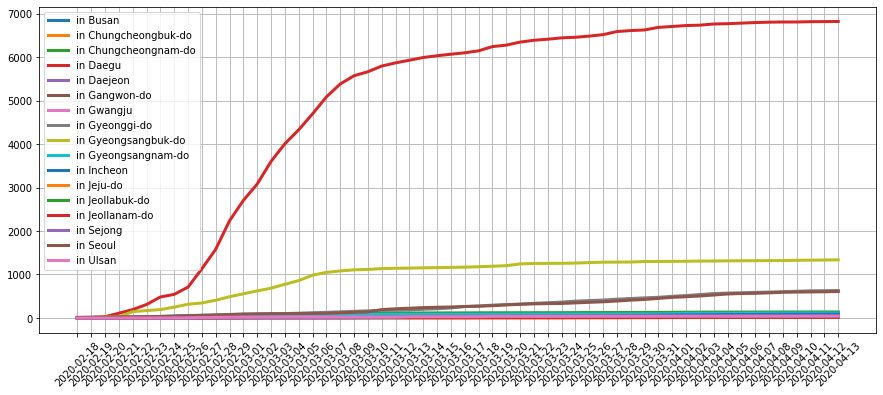

In [6]:
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

df = TimeProvince.iloc[TimeProvince[TimeProvince.date == "2020-02-18"].index[0]:]

for key, grp in df.groupby(['province']): 
    plt.plot(grp['date'], grp['confirmed']
            ,label = "in {}".format(key)
            )
plt.legend(loc='upper left')    
plt.xticks(rotation=45)

plt.show()

다음으로는 지역별 사망자의 증가추세를 보여줍니다.

In [21]:
fig_dec = px.bar(TimeProvince, x="province", y="deceased", color="province",
    animation_frame="date", animation_group="province", range_y=[0,100])
fig_dec.show()

사망자의 수는 확진자의 수에 어느정도 시간의 간격을 두고 비례하는 비슷한 그래프 모양이 나오는 것을 확인할 수 있습니다. => 며칠 후에 ??

### 3) TimeAge

다음은 연령대에 대한 확진자 수의 증가를 애니메이션으로 나타낸 것입니다.

In [22]:
fig_age = px.bar(TimeAge, x="age", y="confirmed", color="age",
    animation_frame="date", animation_group="age", range_y=[0,3000])
fig_age.show()

다른 나이대에 비하여 20대 확진자 수가 가장 많았습니다. => 왜 20대가 많았을까요? 유동인구/행정구별 연령대 인구분포와 연관시켜서 보기! 예를들어 대구에 20대가 많았다?(신천지에 많았겠지ㅠ 신천지 빼도 많음)20대가 많이 사용하는 키워드보기???

같은 데이터를 시계열 그래프로 나타내보았습니다.

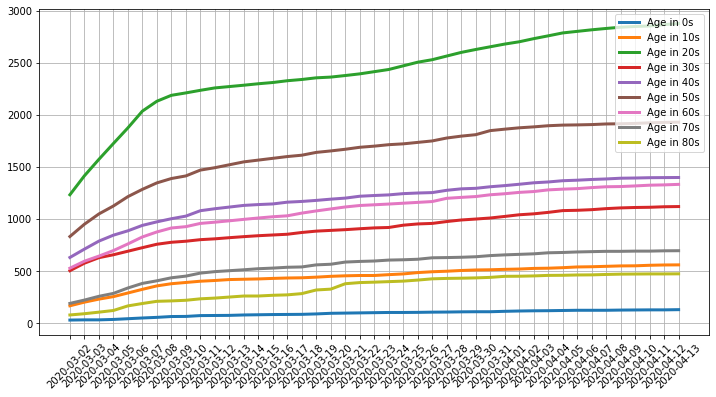

In [8]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

for key, grp in TimeAge.groupby(['age']): 
    plt.plot(grp['date'], grp['confirmed']
            ,label = "Age in {}".format(key)
            )
plt.legend(loc='upper right')    
plt.xticks(rotation=45)

plt.show()

### 4) TimeGender

시간에 따른 성별 확진자 수 증가를 애니메이션으로 나타내었습니다.

In [23]:
fig_sex = px.bar(TimeGender, x="sex", y="confirmed", color="sex",
    animation_frame="date", animation_group="sex", range_y=[0,6000])
fig_sex.show()

여성의 확진자 수가 남성 확진자 수보다 많습니다. 아래에서 같은 내용을 시계열로 나타내보았습니다.

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=TimeGender.date,
                y=TimeGender[TimeGender.sex == "male"].confirmed,
                name="Male",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=TimeGender.date,
                y=TimeGender[TimeGender.sex == "female"].confirmed,
                name="Female",
                line_color='deeppink',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text="Gender; Confirmed")
fig.show()

여성이 질병에 더 취약하기 때문일까요? 접촉자가 많기 때문일까요? 이걸 설명할 수 없다면 summary에서 빼기

### 5) SearchTrend

시간에 따른 네 가지 키워드의 검색량을 표현해 보았습니다.

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=SearchTrend.date,
                y=SearchTrend.cold,
                name="Cold",
                line_color='brown',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=SearchTrend.date,
                y=SearchTrend.flu,
                name="Flu",
                line_color='skyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=SearchTrend.date,
                y=SearchTrend.pneumonia,
                name="Pneumonia",
                line_color='green',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=SearchTrend.date,
                y=SearchTrend.coronavirus,
                name="Corona",
                line_color='red',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text="Search Trend")
fig.show()

COVID 19 가 등장한 기간 동안의 검색량을 보면 아래와 같습니다.

In [26]:
fig = go.Figure()

df = SearchTrend.iloc[SearchTrend[SearchTrend.date == "2019-12-19"].index[0]:]

fig.add_trace(go.Scatter(
                x=df.date,
                y=df.cold,
                name="Cold",
                line_color='brown',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df.date,
                y=df.flu,
                name="Flu",
                line_color='skyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df.date,
                y=df.pneumonia,
                name="Pneumonia",
                line_color='green',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df.date,
                y=df.coronavirus,
                name="Corona",
                line_color='red',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text="Search Trend Recent")
fig.show()

2020년 1월 초에 폐렴과 코로나의 검색 트렌드가 유사한 형태를 가지고 있습니다.

### 5-1) Search Trend + Confirmed

Search Trend 를 Confirmed 수와 함께 보았습니다. 아래 그래프는 위 그래프에서 잘 보이지 않던 Pneumonia 와 Flu 의 트렌드를 더 쉽게 보기 위해 스케일링 되어 있습니다.

In [13]:
grouped = (Time.groupby(['date'])
            .agg({'confirmed':'sum', 'deceased':'sum'})
            .reset_index())
merged = pd.merge(grouped,SearchTrend,
        how='left',
        on=('date')
        )

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=merged.date , y=merged.confirmed, name="Comfirmed"), secondary_y=False)

fig.add_trace(
    go.Scatter(x=merged.date, y=merged.cold, name="Cold trend"), secondary_y=True)

fig.add_trace(
    go.Scatter(x=merged.date, y=merged.flu, name="Flu trend"), secondary_y=True)

fig.add_trace(
    go.Scatter(x=merged.date, y=merged.pneumonia, name="Pneumonia trend"), secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="Confirmed & Search Trend")

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes
fig.update_layout(
    yaxis=dict(title="Confirmed"),
    yaxis2=dict(title="Trend")
)

fig.show()

NameError: name 'merged' is not defined

확진자 수가 증가하고, 사람들이 COVID-19 에 대하여 알게 되기 시작하면서 폐렴의 검색량이 줄게 되었음을 볼 수 있습니다. => 대신 어떤 검색량이 또 늘었는가??????????????

확진자 수가 증가하고, 사람들이 COVID-19 에 대하여 알게 되기 시작하면서 폐렴의 검색량이 줄게 되었음을 볼 수 있습니다. => 대신 어떤 검색량이 또 늘었는가??????????????

- - -

# 2. Region related

### 1) Region

Region 데이터셋은 크게 Count 와 Ratio 관련 변수로 나누어 살펴보겠습니다.

### 1-1) Count

In [28]:
grouped = (Region[Region.province != "Korea"].groupby(['province'])
            .agg({'elementary_school_count':'sum', 'kindergarten_count':'sum', 'university_count':'sum', 'nursing_home_count':'sum'})
            .reset_index())
    
grouped.iloc[:,1:len(grouped)] = grouped.iloc[:,1:len(grouped)]/2 # Region province별 첫 행이 전체 sum값이 들어있음

import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = grouped.province

# Pie Chart !
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
                    ,subplot_titles=["kindergarten", "Elementary", "University", "Nursing Home"])
fig.add_trace(go.Pie(labels=labels, values=grouped.kindergarten_count, name="kindergarten count"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=grouped.elementary_school_count, name="Elementary School count"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=grouped.university_count, name="University count"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=grouped.nursing_home_count, name="Nursing Home count"),
              2, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Region Information")
fig.show()

수도권 지역에 관련 시설들이 많이 분포되어있습니다.

### 1-2) Ratio

Academy Ratio를 세부 행정구역별로 표시하였습니다. 명칭이 중복된 행정구의 경우에는 합산되어 나타났지만 시,도 기준으로 색이 구분되어 있습니다.

In [30]:
import plotly.express as px

fig = px.bar(Region, x="city", y="academy_ratio", color='province')
fig.update_layout(
    title='All Academy Ratio'
    , xaxis=dict(
        tickfont_size=14,
        tickangle = 45))
fig.show()

다음으로는 Elderly Ratio 를 행정구역별로 나타내 보았습니다. 명칭이 중복된 행정구의 경우에는 합산되어 나타났습니다.

In [31]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=Region.city,
                y=Region.elderly_population_ratio,
                name='elderly population ratio'
                # marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=Region.city,
                y=Region.elderly_alone_ratio,
                name='elderly alone ratio',
                marker_color='lightsalmon'
                ))

fig.update_layout(
    title='Elderly Ratio All',
    xaxis=dict(tickfont_size=14, tickangle = 45),
    yaxis=dict(
        title='Ratio (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.75,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

확진자 수가 가장 많았던 대구만 그래프를 그려보았습니다.

In [32]:
seoul = Region[Region.province=="Seoul"].reset_index().drop(0)
gyungi = Region[Region.province=="Gyeonggi-do"].reset_index().drop(0)
daegu = Region[Region.province=="Daegu"].reset_index().drop(0)

fig = go.Figure()
fig.add_trace(go.Bar(x=daegu.city,
                y=daegu.elderly_population_ratio,
                name='elderly population ratio'
                # marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=daegu.city,
                y=daegu.elderly_alone_ratio,
                name='elderly alone ratio',
                marker_color='lightsalmon'
                ))

fig.update_layout(
    title='Elderly Ratio in Daegu',
    xaxis=dict(tickfont_size=14, tickangle = 45),
    yaxis=dict(
        title='Ratio (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.75,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

### 2) Weather

### 2-1) 대구의 온도 변화와 확진자수 증가 추세의 관계

In [33]:
grouped = (Time.groupby(['date'])
            .agg({'confirmed':'sum', 'deceased':'sum'})
            .reset_index())

daegu_weather = Weather[Weather.province=="Daegu"].reset_index()

merged = pd.merge(grouped,daegu_weather.iloc[:,3:],
        how='left',
        on=('date')
        )

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=merged.date , y=merged.confirmed, name="Comfirmed"), secondary_y=False)

fig.add_trace(
    go.Scatter(x=merged.date, y=merged.avg_temp, name="avg_temp"), secondary_y=True)

fig.add_trace(
    go.Scatter(x=merged.date, y=merged.min_temp, name="min_temp"), secondary_y=True)

fig.add_trace(
    go.Scatter(x=merged.date, y=merged.max_temp, name="max_temp"), secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="Confirmed & Temp")

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes
fig.update_layout(
    yaxis=dict(title="Confirmed"),
    yaxis2=dict(title="temp")
)

fig.show()

=> 비오고 바람 많이불면 밖에 많이 안나가고, 유동인구가 줄어드니까, 확진자 수 조금만 늘지않을까? 아니면 상권이용도 줄고...

### 2-2) 나머지 날씨 변수, 확진자수 증가 추세

기온 변수를 제외한 나머지 날씨 변수들과 확진자 수의 상관관계가 있는지 확인해 보았습니다.

In [34]:
fig = px.scatter_matrix(merged[["confirmed","deceased","precipitation","max_wind_speed","most_wind_direction","avg_relative_humidity"]])
fig.update_layout(
    title='Weather Scatter Matrix')
fig.show()

- - -

# 3. Case + Patient Related

### 1. Patient : 확진자 경로

주어진 PatientRoute 데이터를 가지고 확진자의 경로를 보기 쉽게 지도 위에 애니메이션으로 나타냈습니다.

#### 경로의 색깔 : 확진자가 접촉한 사람 수에 따라서

#### 접촉자 0 명 : 초록색

#### 접촉자 1~10 명 : 파란색

#### 접촉자 11~100명 : 노란색

#### 접촉자 100 초과 : 빨간색

#### 접촉자 수가 최다인 사람 : 검정색

In [37]:
contnum = PatientInfo.iloc[:,[0,12]]
clr = []
for i in range(len(contnum)) :
    if contnum.contact_number[i] == 0 :
        clr.append("green")
    elif contnum.contact_number[i] <= 10 :
        clr.append("blue")
    elif contnum.contact_number[i] <= 100 :
        clr.append("yellow")
    elif contnum.contact_number[i] == max(contnum.contact_number) :
        clr.append("black")
    else : 
        clr.append("red")
contnum["color"] = clr
wcontnum = pd.merge(PatientRoute,contnum,
        how ='left',
        on = 'patient_id').fillna(0)
route_geo = gpd.GeoDataFrame(wcontnum,geometry=gpd.points_from_xy(PatientRoute.longitude,PatientRoute.latitude))

linerange = route_geo[route_geo['patient_id'] == route_geo['patient_id'].shift(1)].index
linerange = linerange.drop(linerange[-1])
lines = [ {
                "coordinates": [
                 [route_geo["longitude"][i] , route_geo["latitude"][i] ],
                 [route_geo["longitude"][i+1] , route_geo["latitude"][i+1],]
                   ],
                "dates": [
                 route_geo["date"][i],
                 route_geo["date"][i+1]
                   ],
                "color": route_geo["color"][i]
                     } for i in linerange ] 
features = [
     {
         'type': 'Feature',
         'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
                },
         'properties': {
            'times': line['dates'],
            'style': {
                'color' : line['color']
            },
            'icon' : 'circle',
            'iconstyle':{
                    'fillOpacity': 0.8,
                    'stroke': 'true',
                    'radius': 3
                }
                }
        }
        for line in lines
    ]


m = folium.Map(
  location=[36.5053542,127.7043419],
  zoom_start=8
)
plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT6H', add_last_point=True).add_to(m)
m.save('with_color.html')
m

### 2) 시간에 따른 infection case 별 확진자 수

In [38]:
inf_case = PatientInfo.infection_case.unique()
for i in range(len(inf_case)) :
    globals()['case'+ str(i)] = PatientInfo[PatientInfo.infection_case == inf_case[i]]
    globals()['case'+str(i)] = pd.DataFrame(globals()['case'+ str(i)].groupby('confirmed_date').count().cumsum().patient_id).reset_index()
    globals()['case'+str(i)].columns = ['confirmed_date','case'+str(i)]   

merged = case0
for i in [x for x in range(len(inf_case)) if x != 0] :
    merged = pd.merge(merged , globals()['case'+str(i)],how= 'outer',on='confirmed_date')
merged = merged.sort_values(by = 'confirmed_date').reset_index()
merged = merged.drop('index',axis=1)
merged.columns = np.insert(inf_case,0,'confirmed_date')
merged = merged.fillna(method='pad')
merged = merged.fillna(0)
merged = merged.set_index('confirmed_date')
fig = merged.iplot(asFigure=True, kind='scatter')
fig.show()

1차 제출 후 변동사항 : overseas inflow 도 기울기가 완만해지기 시작. contact with patient 는 거의 기울기가 1 정도 수준 유지하는 것처럼 보임

### 아래부터 1차 제출 이후 임선우 작업 내용

## PatientInfo : 지역별 확진자수

In [48]:
total = gpd.read_file("total")
city = total[["SIG_ENG_NM","geometry"]]
city.columns = ['city' ,'geometry']
city_count = PatientInfo.city.value_counts()
city_count = pd.DataFrame(city_count).reset_index()
city_count.columns = ['city','count']
city_count_geo = pd.merge(city,city_count,how='left')
cityjson = city.to_json()
city_count_geo.index = city_count_geo["count"].index.map(str) 

In [49]:
bins = list(city_count_geo['count'].quantile([0, 0.4,0.9, 0.98,0.997, 1]))

m = folium.Map(
  location=[36.5053542,127.7043419],
  zoom_start=7,
)

folium.Choropleth(
    geo_data=cityjson,
    data=city_count_geo["count"],
    columns=[city_count_geo.index, city_count_geo['count']],
    key_on='feature.id',
    fill_color='YlGnBu',
    legend_name='Number of Confirmed COVID 19',
    bins = bins
).add_to(m)

folium.LayerControl().add_to(m)
m

## RSV 바이러스와의 비교

### 호흡기 세포 융합 바이러스(RSV) 

* 잠복기 평균 5일
* 전파경로: 감염자의 분비물과 직접 접촉 혹은 비말 전파
* 바이러스는 증상이 나타나기 수일 전부터 배출 가능. 
* 고령자나 면역저하자에게 입원을 요하는 폐렴의 원인
* 인플루엔자와 비슷한 빈도로 발생
* 10월 - 3월 사이에 주로 발생

### 코로나 주별 데이터로 바꾸기

In [56]:
timedat = Time.set_index('date').drop('time',axis=1)
dailyconf = timedat.confirmed.diff()
dailyconf[0] = 1
dailyconf = pd.DataFrame(dailyconf)
dailyconf.index = pd.to_datetime(dailyconf.index)
dailyconf['week'] = dailyconf.index.week
dailyconf['year'] = pd.DatetimeIndex(Time.date).year
weekconf = dailyconf.groupby(['year','week']).sum() 
fig2 = weekconf.iplot(asFigure=True, kind='scatter')
fig2.show()

### RSV 데이터 (http://www.cdc.go.kr/npt/biz/npp/iss/ariStatisticsMain.do)

In [57]:
rsv = pd.read_csv('rsv.csv',header=None)
rsv = rsv.set_index([0,1])
rsv = rsv.drop(3,axis=1)
rsv.columns = ['rsv']
fig3 = rsv.iplot(asFigure=True, kind='scatter')
fig3.show()

In [58]:
comb = pd.concat([rsv,weekconf],axis=1)
comb.columns = ['rsv','corona']
fig4 = comb.iplot(asFigure=True,kind='scatter')
fig4.show()

비슷한 경로로 전염되는 질병인 rsv 보다 전파 속도가 훨씬 빨랐고, 한편 감염자가 줄어드는 속도도 빨랐다.